In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_data = pd.read_csv('train_normalized.csv')
test_data = pd.read_csv('test_normalized.csv')


Seguindo o exemplo da random forest, vamos fazer um mini tratamento de dados

In [3]:
# Combinar colunas de atraso na saída
train_data['atraso_saida'] = train_data.apply(lambda row: f"{int(row['Pouco Atraso na saida'])}{int(row['Atraso na saida'])}", axis=1)
test_data['atraso_saida'] = test_data.apply(lambda row: f"{int(row['Pouco Atraso na saida'])}{int(row['Atraso na saida'])}", axis=1)
# Combinar colunas de atraso na chegada
train_data['atraso_chegada'] = train_data.apply(lambda row: f"{int(row['Pouco Atraso na chegada'])}{int(row['Atraso na chegada'])}", axis=1)
test_data['atraso_chegada'] = test_data.apply(lambda row: f"{int(row['Pouco Atraso na chegada'])}{int(row['Atraso na chegada'])}", axis=1)
# Combinar colunas de idade
train_data['idade'] = train_data.apply(lambda row: f"{int(row['Criança'])}{int(row['Adulto'])}{int(row['Idoso'])}", axis=1)
test_data['idade'] = test_data.apply(lambda row: f"{int(row['Criança'])}{int(row['Adulto'])}{int(row['Idoso'])}", axis=1)
# Combinar colunas de duração
train_data['duracao'] = train_data.apply(lambda row: f"{int(row['Curto'])}{int(row['Médio'])}{int(row['Longo'])}", axis=1)
test_data['duracao'] = test_data.apply(lambda row: f"{int(row['Curto'])}{int(row['Médio'])}{int(row['Longo'])}", axis=1)

train_data.drop(columns=[
    'Pouco Atraso na saida', 'Atraso na saida',
    'Pouco Atraso na chegada', 'Atraso na chegada',
    'Criança', 'Adulto', 'Idoso',
    'Curto', 'Médio', 'Longo'
], inplace=True)

test_data.drop(columns=[ 
    'Pouco Atraso na saida', 'Atraso na saida',
    'Pouco Atraso na chegada', 'Atraso na chegada',
    'Criança', 'Adulto', 'Idoso',
    'Curto', 'Médio', 'Longo'
], inplace=True)

print(train_data.head())
print(test_data.head())

   Gender  Customer Type  Type of Travel  Class  Inflight wifi service   
0       0              1               1    0.5                    0.4  \
1       1              1               1    0.5                    0.6   
2       0              1               1    0.5                    0.8   
3       1              1               0    0.0                    0.8   
4       0              1               1    0.5                    0.6   

   Departure/Arrival time convenient  Ease of Online booking  Gate location   
0                                0.4                     0.4            0.4  \
1                                0.6                     0.6            0.6   
2                                0.6                     0.8            0.8   
3                                0.4                     0.8            0.6   
4                                0.6                     0.6            0.6   

   Food and drink  Online boarding  ...  Leg room service  Baggage handling   
0

In [4]:

X_train = train_data.drop('satisfaction', axis=1)
y_train = train_data['satisfaction']

X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data['satisfaction']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


Vamos inciar um GradientBoost simples, com valores padrões e a partir deles vamos tentar melhorar a acuracia

In [5]:
# Inicializar o modelo
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9423698798891285
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14573
           1       0.94      0.93      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [6]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9002155836156452
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     14573
           1       0.88      0.90      0.89     11403

    accuracy                           0.90     25976
   macro avg       0.90      0.90      0.90     25976
weighted avg       0.90      0.90      0.90     25976



o resultado foi muito pior, vamos ver se foi por causa do learning rate menor fazendo ele não ter tempo de aprender

In [7]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9508007391438251
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14573
           1       0.95      0.94      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



Chegamos em um resultado ainda melhor que o primeiro caso, vamos tentar aumentar mais uma vez o n_estimators antes de mexer na learning rate

In [8]:
model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9545734524176163
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14573
           1       0.95      0.94      0.95     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



O resultado ainda aumentou um pouco, vamos agora aumentar o profundidade maxima e diminuir a learning rate, para deixar o modelo mais complexo e ver como ele lida com isso no nosso dataset

In [9]:
model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9549584231598398
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14573
           1       0.95      0.94      0.95     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



A acuracia se manteve basicamente a mesma, vamos tentar o mesmo modelo com learning rate de 0.1

In [10]:
model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9592700954727441
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14573
           1       0.96      0.95      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



Conseguimos aumentar ainda mais a acuracia final, podemos perceber que aparentemente o modelo não esta sofrendo overfiting para esses parametros, vamos tentar aumentar mais uma vez a profundidade e ver como ele se comporta

In [11]:
model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9608099784416384
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14573
           1       0.96      0.95      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



Conseguimos chegar em uma acuracia de 0.96, vamos tentar aumentar uma ultima vez o n_estimatores 

In [12]:
model = GradientBoostingClassifier(n_estimators=400, learning_rate=0.1, max_depth=5, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9606174930705267
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14573
           1       0.96      0.95      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



O resultado não se pagou. Pode ter acontecido overfiting, ja que o número de estimators está muito alto para uma learning rate elevada. Ficamos por enquanto com o melhor modelo sendo: n_estimatores=300, learning_rate=0.1 e max_depth=5, agora vamos fazer um grid search com novos parametros para ver se conseguimos melhores resultados

Tentamos realizar o grid_search porém estava demorando muito, vamos tentar usar um optune do xgboost, que é um tipo de gradient boost otimizado.

In [15]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Convertendo colunas para o tipo categórico
categorical_columns = ['atraso_saida', 'atraso_chegada', 'idade', 'duracao']
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')

def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',  # ou 'binary:logistic' para classificação binária
        'eval_metric': 'rmse',
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'enable_categorical': True  # Habilitar suporte experimental para dados categóricos
    }
    
    model = xgb.XGBRegressor(**param)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)
    
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Melhores parâmetros: ", study.best_params)
print("Melhor RMSE: ", study.best_value)

[I 2024-07-23 16:56:30,155] A new study created in memory with name: no-name-8daed722-fe9a-461d-9cb3-f5e84ea68a2c
C:\Users\luize\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2024-07-23 16:56:31,385] Trial 0 finished with value: 0.1963666750214297 and parameters: {'max_depth': 3, 'learning_rate': 0.0721829250555047, 'n_estimators': 256, 'subsample': 0.7066407783831921, 'colsample_bytree': 0.7956896973805597}. Best is trial 0 with value: 0.1963666750214297.
C:\Users\luize\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will 

Melhores parâmetros:  {'max_depth': 9, 'learning_rate': 0.06903191648377224, 'n_estimators': 232, 'subsample': 0.8617859291877309, 'colsample_bytree': 0.7542018459378081}
Melhor RMSE:  0.16062665568452214


In [18]:
categorical_columns = ['atraso_saida', 'atraso_chegada', 'idade', 'duracao']

for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

best_params = study.best_params
best_params['enable_categorical'] = True 

final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

preds_test_proba = final_model.predict_proba(X_test)[:, 1]
preds_test = (preds_test_proba >= 0.5).astype(int)

final_rmse = mean_squared_error(y_test, preds_test, squared=False)
accuracy = accuracy_score(y_test, preds_test)

print("RMSE no conjunto de teste: ", final_rmse)
print("Acurácia no conjunto de teste: ", accuracy)

RMSE no conjunto de teste:  0.19767278602704644
Acurácia no conjunto de teste:  0.9609254696643055


C:\Users\luize\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Depois do optune conseguimos chegar no melhor resultado com esses parametros: 'max_depth': 9, 'learning_rate': 0.06903191648377224, 'n_estimators': 232, 'subsample': 0.8617859291877309, 'colsample_bytree': 0.7542018459378081, vamos agora printar a matriz de confusão, curva roc e ks.

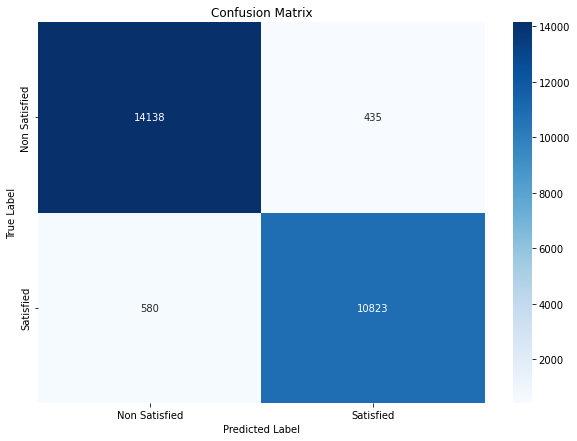

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, preds_test)

# Visualizar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Satisfied', 'Satisfied'], yticklabels=['Non Satisfied', 'Satisfied'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

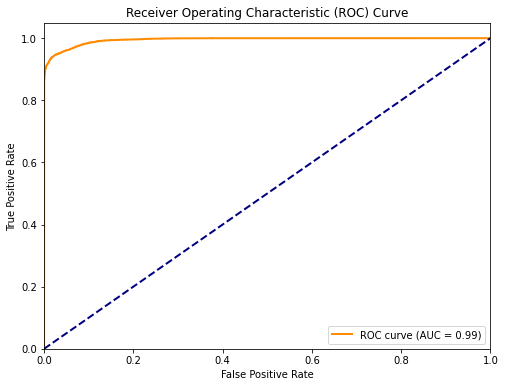

In [20]:
from sklearn.metrics import roc_curve, auc


y_test_pred_prob = final_model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

# Visualizar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

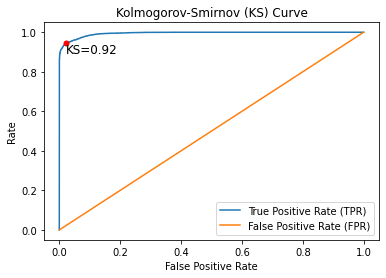

KS Statistic: 0.92


In [21]:
from scipy.stats import ks_2samp

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)

# Calculando a estatística KS
ks_statistic = np.max(tpr - fpr)
ks_idx = np.argmax(tpr - fpr)

plt.figure()
plt.plot(fpr, tpr, label='True Positive Rate (TPR)')
plt.plot(fpr, fpr, label='False Positive Rate (FPR)')
plt.plot([fpr[ks_idx]], [tpr[ks_idx]], marker='o', markersize=5, color="red")
plt.text(fpr[ks_idx], tpr[ks_idx], f'KS={ks_statistic:.2f}', fontsize=12, verticalalignment='top')
plt.xlabel('False Positive Rate')
plt.ylabel('Rate')
plt.title('Kolmogorov-Smirnov (KS) Curve')
plt.legend(loc='best')
plt.show()

print(f"KS Statistic: {ks_statistic:.2f}")

Depois de fazer optune e testar alguns parâmetros, chegamos aos mesmos resultados da random forest.